# Descriptive Statistics Review

In this second part of the lab, we are going to continue working with the data that we cleaned in the last part. 
Be sure to continue to write clean code and comment your work well!

First, lets import our libraries and the data we saved. 

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import sem

In [2]:
diamonds = pd.read_csv('diamonds_clean.csv')
diamonds = diamonds.drop('Unnamed: 0', axis = 1)
diamonds

carat        cut  color  clarity  depth  table  price     x     y     z
0       0.23      Ideal      5        1   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium      5        2   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good      5        4   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium      1        3   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good      0        1   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...    ...      ...    ...    ...    ...   ...   ...   ...
53927   0.72      Ideal      6        2   60.8   57.0   2757  5.75  5.76  3.50
53928   0.72       Good      6        2   63.1   55.0   2757  5.69  5.75  3.61
53929   0.70  Very Good      6        2   62.8   60.0   2757  5.66  5.68  3.56
53930   0.86    Premium      2        1   61.0   58.0   2757  6.15  6.12  3.74
53931   0.75      Ideal      6        1   62.2   55.0   2757  5.83  5.87  3.64

[53932 rows x 10 columns]

Now that we cleaned our data, we can proceed with some exploratory analysis. We will analyze the features that affect price the most.

Let's start by looking at how the charateristics of a diamond (especially the price, since that's our focus) change based on its color. Remember that you can use the `groupby()` method in pandas. 

**Using the `describe()` method, take a look on the dataset paying special attention to the variability. Comment what you see.**

In [3]:
diamonds.describe()

carat         color       clarity         depth         table  \
count  53932.000000  53932.000000  53932.000000  53932.000000  53932.000000   
mean       0.797879      3.405789      3.051101     61.749336     57.457029   
std        0.473986      1.701165      1.647109      1.432514      2.234064   
min        0.200000      0.000000      0.000000     43.000000     43.000000   
25%        0.400000      2.000000      2.000000     61.000000     56.000000   
50%        0.700000      3.000000      3.000000     61.800000     57.000000   
75%        1.040000      5.000000      4.000000     62.500000     59.000000   
max        5.010000      6.000000      7.000000     79.000000     95.000000   

              price             x             y             z  
count  53932.000000  53932.000000  53932.000000  53932.000000  
mean    3932.136079      5.732007      5.734142      3.539735  
std     3988.734835      1.119670      1.113276      0.692051  
min      326.000000      3.730000      3.680000      1.070000  
25%      949.750000      4.710000      4.720000      2.910000  
50%     2401.000000      5.700000      5.710000      3.530000  
75%     5324.000000      6.540000      6.540000      4.040000  
max    18823.000000     10.740000     19.278421      8.060000

In [ ]:
# COMMENTS
'''
I see that the data looks better now that it's been cleaned. We also don't have the 0's in the
x, y and z columns as we did before, since we corrected them and dropped the ones that couldn't be
corrected.
I can also see that the STD of carat, color, clarity and depth isn't so high, which means the values
are close to the mean and not so spread and far apart.
That can be opposed to the price column's STD, which is huge, and that makes sense, since the
price varies by an incredible amount, going from a 326 to 18.8k USD.
'''

Let's proceed to check each feature separately. 

**Before starting, which features do you think that will affect the price most and why? You will contrast your hypotheses with your results.**

In [ ]:
# HYPOTHESES
'''
I think that color and clarity are determined by the quality of the diamond? And that the carat, x, y
and z are the physical measures and qualities of each diamond.
So I'm guessing there should be a relation here, since the better quality and bigger diamonds should
be priced way higher than the ones that are of a lesser quality and have a smaller size.
'''

## 1. The `color` column
First, let's look at the color column.

**For each different color, find the mean of each column. You should have a matrix with every color as rows and the columns `carat`, `clarity`, etc as columns.**

In [4]:
# Doing a groupby with the color and getting the mean for every column
diamonds_color_grouped = diamonds.groupby('color').mean()
diamonds_color_grouped

carat   clarity      depth      table        price         x  \
color                                                                    
0      1.162137  2.776353  61.887215  57.812393  5323.818020  6.519338   
1      1.026927  2.964035  61.846385  57.577278  5091.874954  6.222826   
2      0.911627  2.933871  61.836557  57.518176  4484.958805  5.984776   
3      0.771088  3.463419  61.757449  57.288060  3998.145173  5.678549   
4      0.736509  3.134605  61.694087  57.433148  3725.091938  5.616727   
5      0.657867  2.969889  61.662090  57.491201  3076.752475  5.411580   
6      0.657715  2.691025  61.698066  57.404355  3168.106436  5.417851   

              y         z  
color                      
0      6.518130  4.033251  
1      6.222728  3.846369  
2      5.981484  3.699147  
3      5.681198  3.507966  
4      5.620529  3.465938  
5      5.416949  3.337767  
6      5.421928  3.343320

**What do you see? Pay special attention to the relationship between price and color.**

In [ ]:
'''
Well, it seems very strange now, actually, because the worst color rating has the highest mean price,
and the best color rating has almost the lowest mean price. In fact, the last 2 best color ratings
(5 and 6) have the lowest mean prices. Is it supposed to be like this?
'''

Let's go further into the color feature. We will plot the frequency distribution of the diamonds color in our dataset. 

**Plot the distribution and analyze it. Remember that you can use the pandas `plot()` method.**

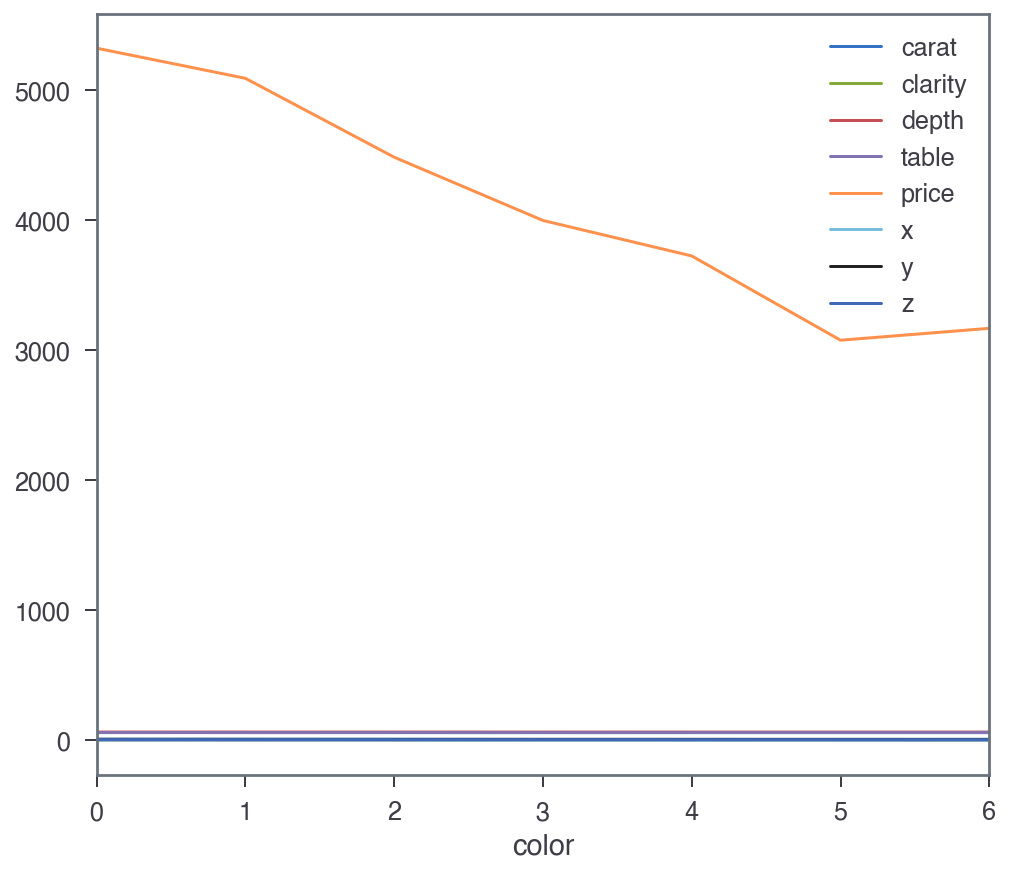

In [5]:
# FIRST PLOT - Price inverse relation with color
diamonds_color_grouped.plot();

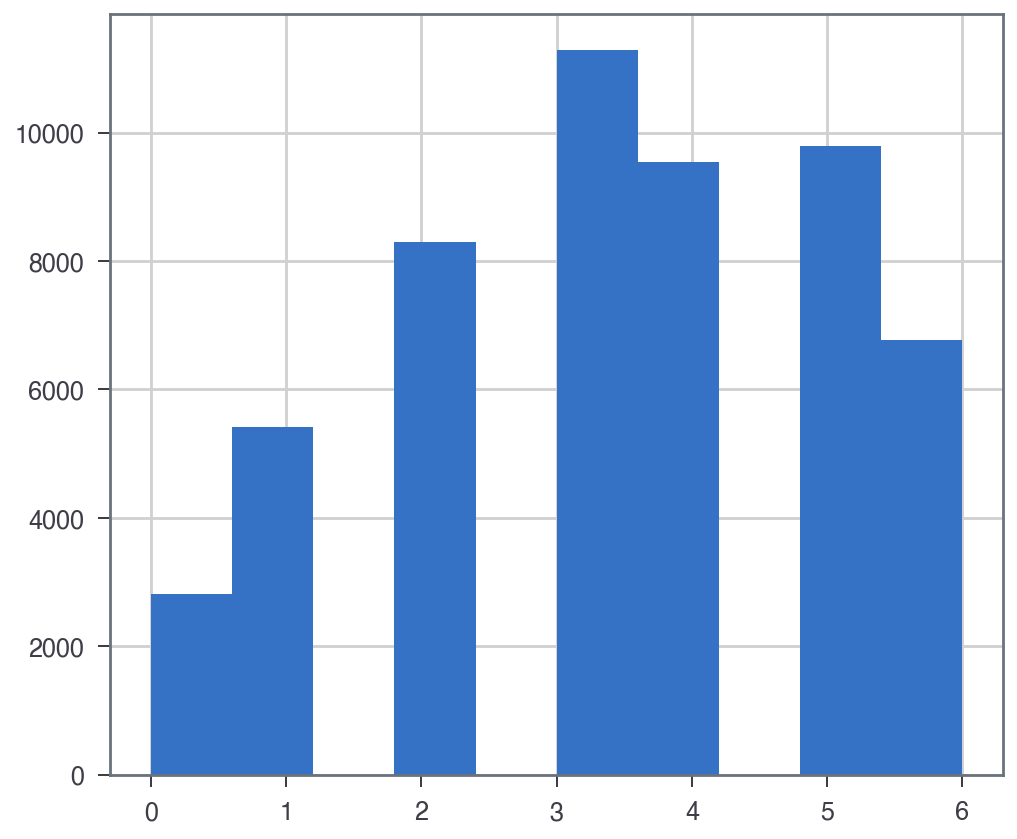

In [6]:
# SECOND PLOT - Color frequency
diamonds['color'].hist();

In [ ]:
# COMMENTS
'''
In the first plot we can see that there seems to be like a negative correlation with the price and
the diamonds' colors? That's very interesting, actually, and the rest of all the other variables
seem to just be left at the bottom of the graph, untouched and with no relation at all.

However, on the second graph, which now uses the full dataset and the color column, we can see just
the frequency, as you guys asked. And we can see how many diamonds we roughly have per diamond color.
Seems like they aren't that badly spread apart, actually, and the big majority is around 3-4, but
5-6 also has quite a bit of diamonds.
'''

## 2.The `carat` column 

Let's check the `carat` (weight), since this could also be a potential factor for price change.

**Find the mean of each column for each value of `carat` using the `groupby` method. Then comment your results.**

In [7]:
diamonds_carat_grouped = diamonds.groupby('carat').mean()
diamonds_carat_grouped

color   clarity      depth      table         price          x  \
carat                                                                      
0.20   5.166667  2.833333  61.100000  59.333333    365.166667   3.786667   
0.21   5.444444  2.666667  60.511111  58.444444    380.222222   3.874444   
0.22   4.800000  2.600000  61.620000  60.400000    391.400000   3.898000   
0.23   4.518771  4.901024  61.426621  58.034130    486.143345   3.946382   
0.24   4.185039  4.972441  61.599213  57.488189    505.185039   3.990157   
...         ...       ...        ...        ...           ...        ...   
4.00   1.000000  0.000000  63.300000  58.000000  15984.000000  10.010000   
4.01   0.500000  0.000000  61.750000  61.500000  15223.000000  10.080000   
4.13   2.000000  0.000000  64.800000  61.000000  17329.000000  10.000000   
4.50   0.000000  0.000000  65.800000  58.000000  18531.000000  10.230000   
5.01   0.000000  0.000000  65.500000  59.000000  18018.000000  10.740000   

               y         z  
carat                       
0.20    3.753333  2.303333  
0.21    3.837778  2.332222  
0.22    3.848000  2.386000  
0.23    3.973379  2.431468  
0.24    4.019331  2.465591  
...          ...       ...  
4.00    9.940000  6.310000  
4.01   10.014754  6.205000  
4.13    9.850000  6.430000  
4.50   10.195532  6.720000  
5.01   10.572977  6.980000  

[273 rows x 8 columns]

In [ ]:
# COMMENTS
'''
Now we can clearly see that there should be a high correlation with the carat and the price, as we
can observe that as the carat goes up so does the price, which makes a lot of sense.
The bigger/heavier the diamond, the bigger the price.
'''


**Plot a histogram of the `carat` column by using the `plot` method (see the docs to find an easy way to do so). What is happening?**

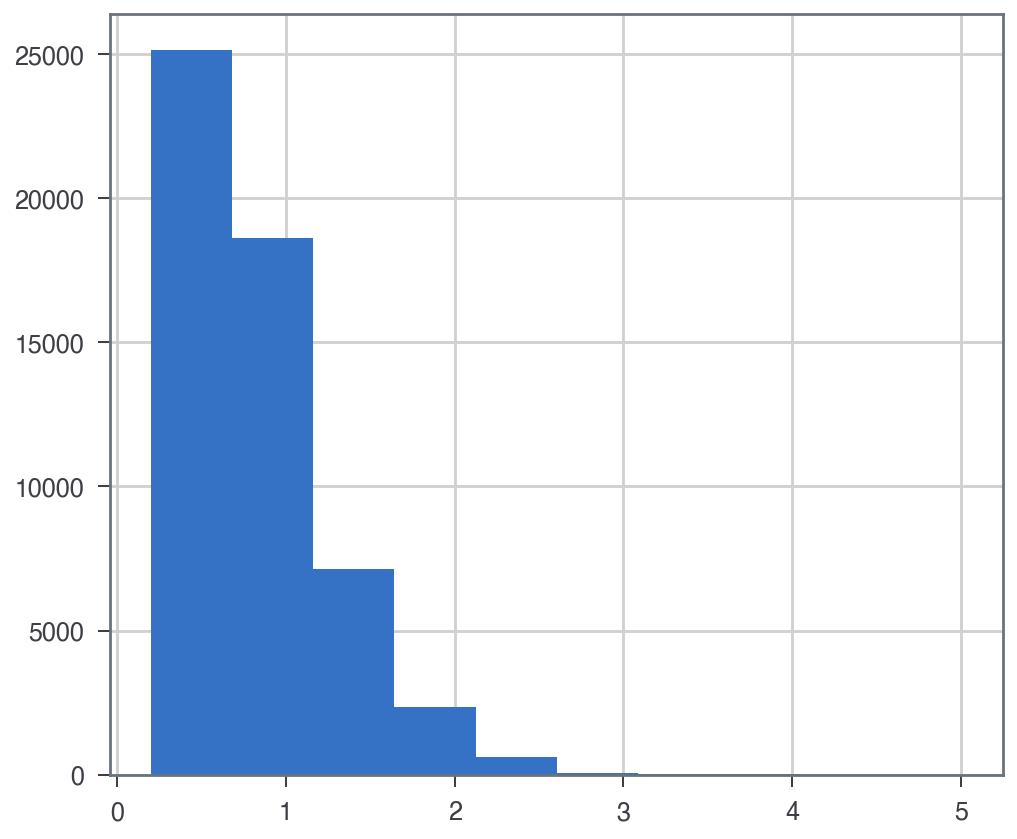

In [8]:
# PLOT 1 - Carat frequency
diamonds['carat'].hist(); # don't know if I should use bins or not. Kinda like it like this

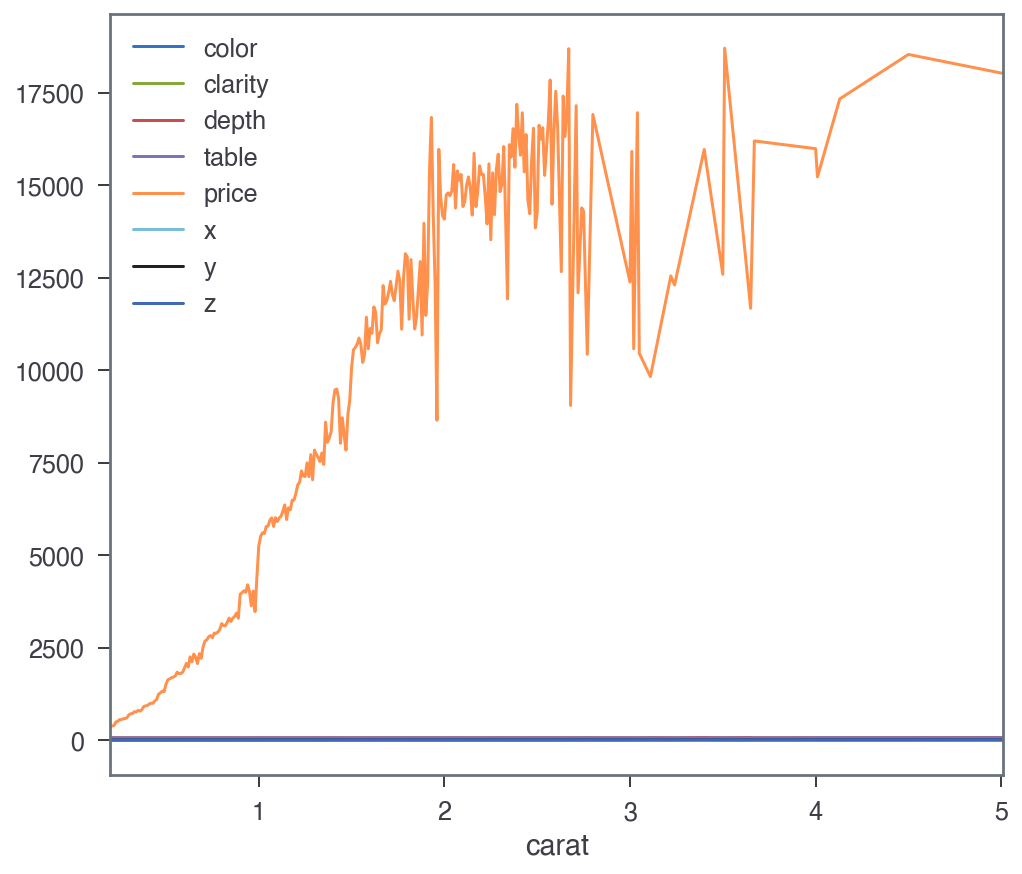

In [9]:
# PLOT 2 - Carat positive relation with price
diamonds_carat_grouped.plot();

In [ ]:
# COMMENTS
'''
We can see that there is a high concentration of diamonds with weights between 0-1 (Plot 1).
We can also observe that there seems to be a high correlation between price and carat, as when one
goes up, so does the other, like the plot 2 seems to report.
'''

# 3. The `table` and `clarity` column
Finally, let's check the `table`.

**Find the mean of each column for each value of `table` using the `groupby` method. Then comment your results.**

In [10]:
diamonds_table_grouped = diamonds.groupby('table').mean()
diamonds_table_grouped

carat  color  clarity  depth    price      x      y      z
table                                                             
43.0   1.0400    1.0     4.00  62.90   4997.0  6.450  6.410  4.040
44.0   0.2900    5.0     4.00  62.80    474.0  4.200  4.240  2.650
49.0   0.6500    3.0     3.00  64.25   2290.5  5.355  5.320  3.425
50.0   1.5100    3.0     2.00  61.50   8995.5  7.380  7.295  4.510
50.1   0.9400    2.0     1.00  66.00   3353.0  6.130  6.170  4.060
...       ...    ...      ...    ...      ...    ...    ...    ...
71.0   0.6800    3.0     2.00  58.00   1633.0  5.850  5.700  3.350
73.0   0.6025    4.5     3.25  68.90   2406.5  5.520  5.465  3.745
76.0   0.7900    3.0     2.00  65.30   2362.0  5.520  5.130  3.350
79.0   0.8100    4.0     1.00  68.80   2301.0  5.260  5.200  3.580
95.0   2.0100    4.0     2.00  58.60  13387.0  8.320  8.310  4.870

[127 rows x 8 columns]

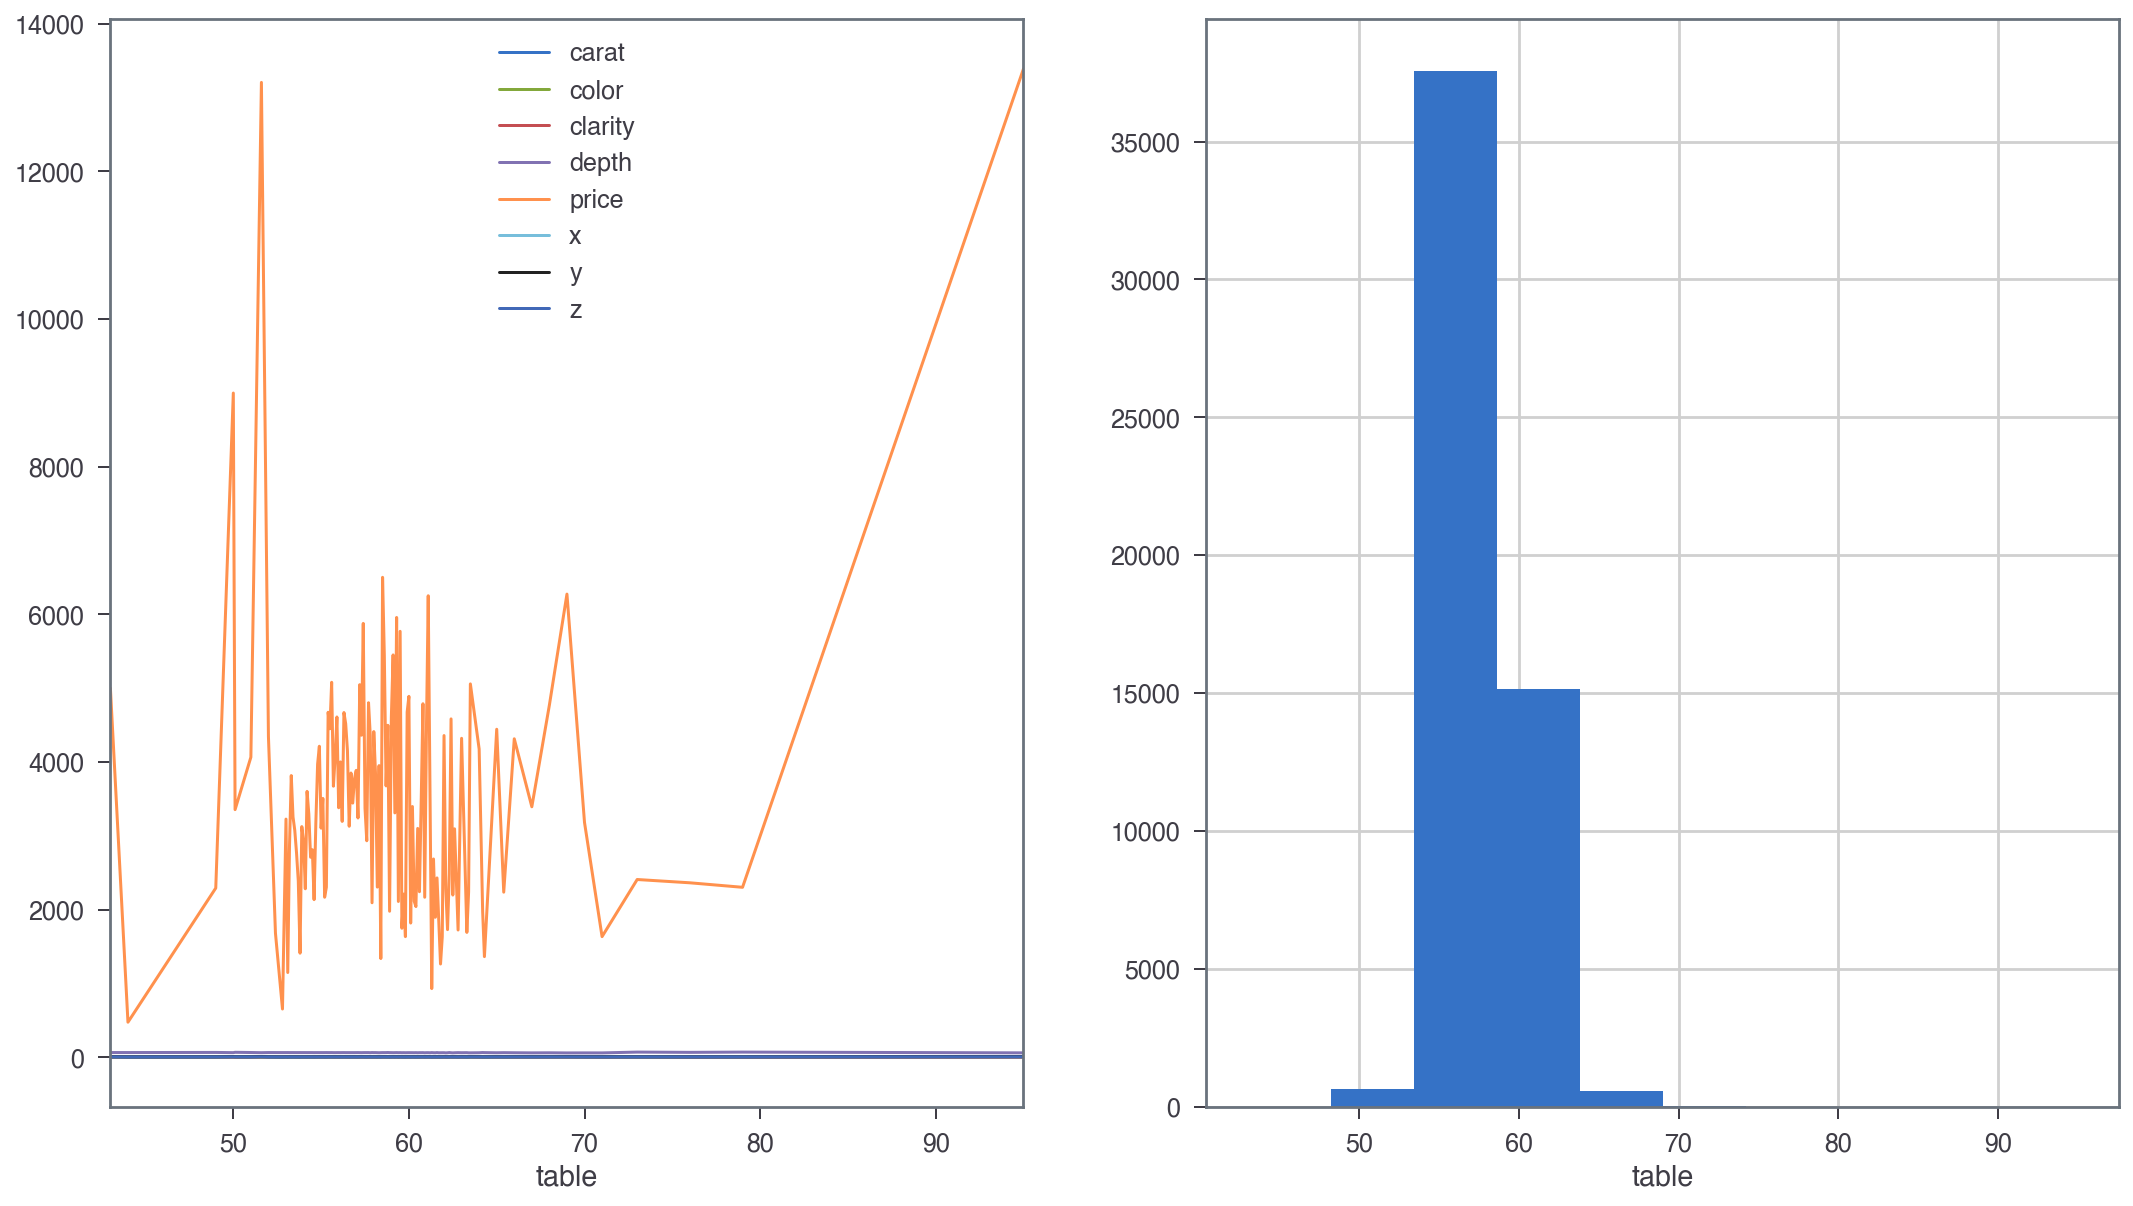

In [11]:
# PLOTS & COMMENTS
'''
There seems to be a lot of diamonds concentraded around the 55-58 table mark. We can also see that
price doesn't seem to have a very linear relation with the table factor, as in the first plot we
observe a lot of ups and downs, and after the high concentration around the 55 mark, it generally
tends to go up as the table value increases as well.
'''
fig, axes = plt.subplots(1, 2, figsize = (18, 10))#, sharex=True) - seems like it's the same
diamonds_table_grouped.plot(ax = axes[0])
table_plot = diamonds['table'].hist(ax = axes[1])
table_plot.set_xlabel('table')
plt.show()
# P.S. only remembered to keep the plots all in same cell later and I'm too tired to change the others

**Finally, do the same with the `clarity` column.**

In [12]:
#your code here
diamonds_clarity_grouped = diamonds.groupby('clarity').mean()
diamonds_clarity_grouped

carat     color      depth      table        price         x  \
clarity                                                                    
0        1.283846  2.968961  62.734278  58.303779  3924.168691  6.761093   
1        1.077602  3.469967  61.771567  57.926823  5062.267356  6.404157   
2        0.850482  3.448450  61.853042  57.662541  3996.001148  5.888383   
3        0.763850  3.494370  61.724249  57.418040  3924.166204  5.658633   
4        0.727108  3.161812  61.667968  57.313966  3839.144308  5.572860   
5        0.596202  3.569483  61.663778  57.024990  3283.737071  5.218454   
6        0.503131  3.350848  61.624521  56.883881  2519.512315  4.961721   
7        0.505123  3.101676  61.510615  56.507207  2864.839106  4.968402   

                y         z  
clarity                      
0        6.709458  4.224688  
1        6.395579  3.952642  
2        5.888256  3.640636  
3        5.659782  3.492788  
4        5.580017  3.437925  
5        5.232118  3.221465  
6        4.976437  3.062132  
7        4.989827  3.061659

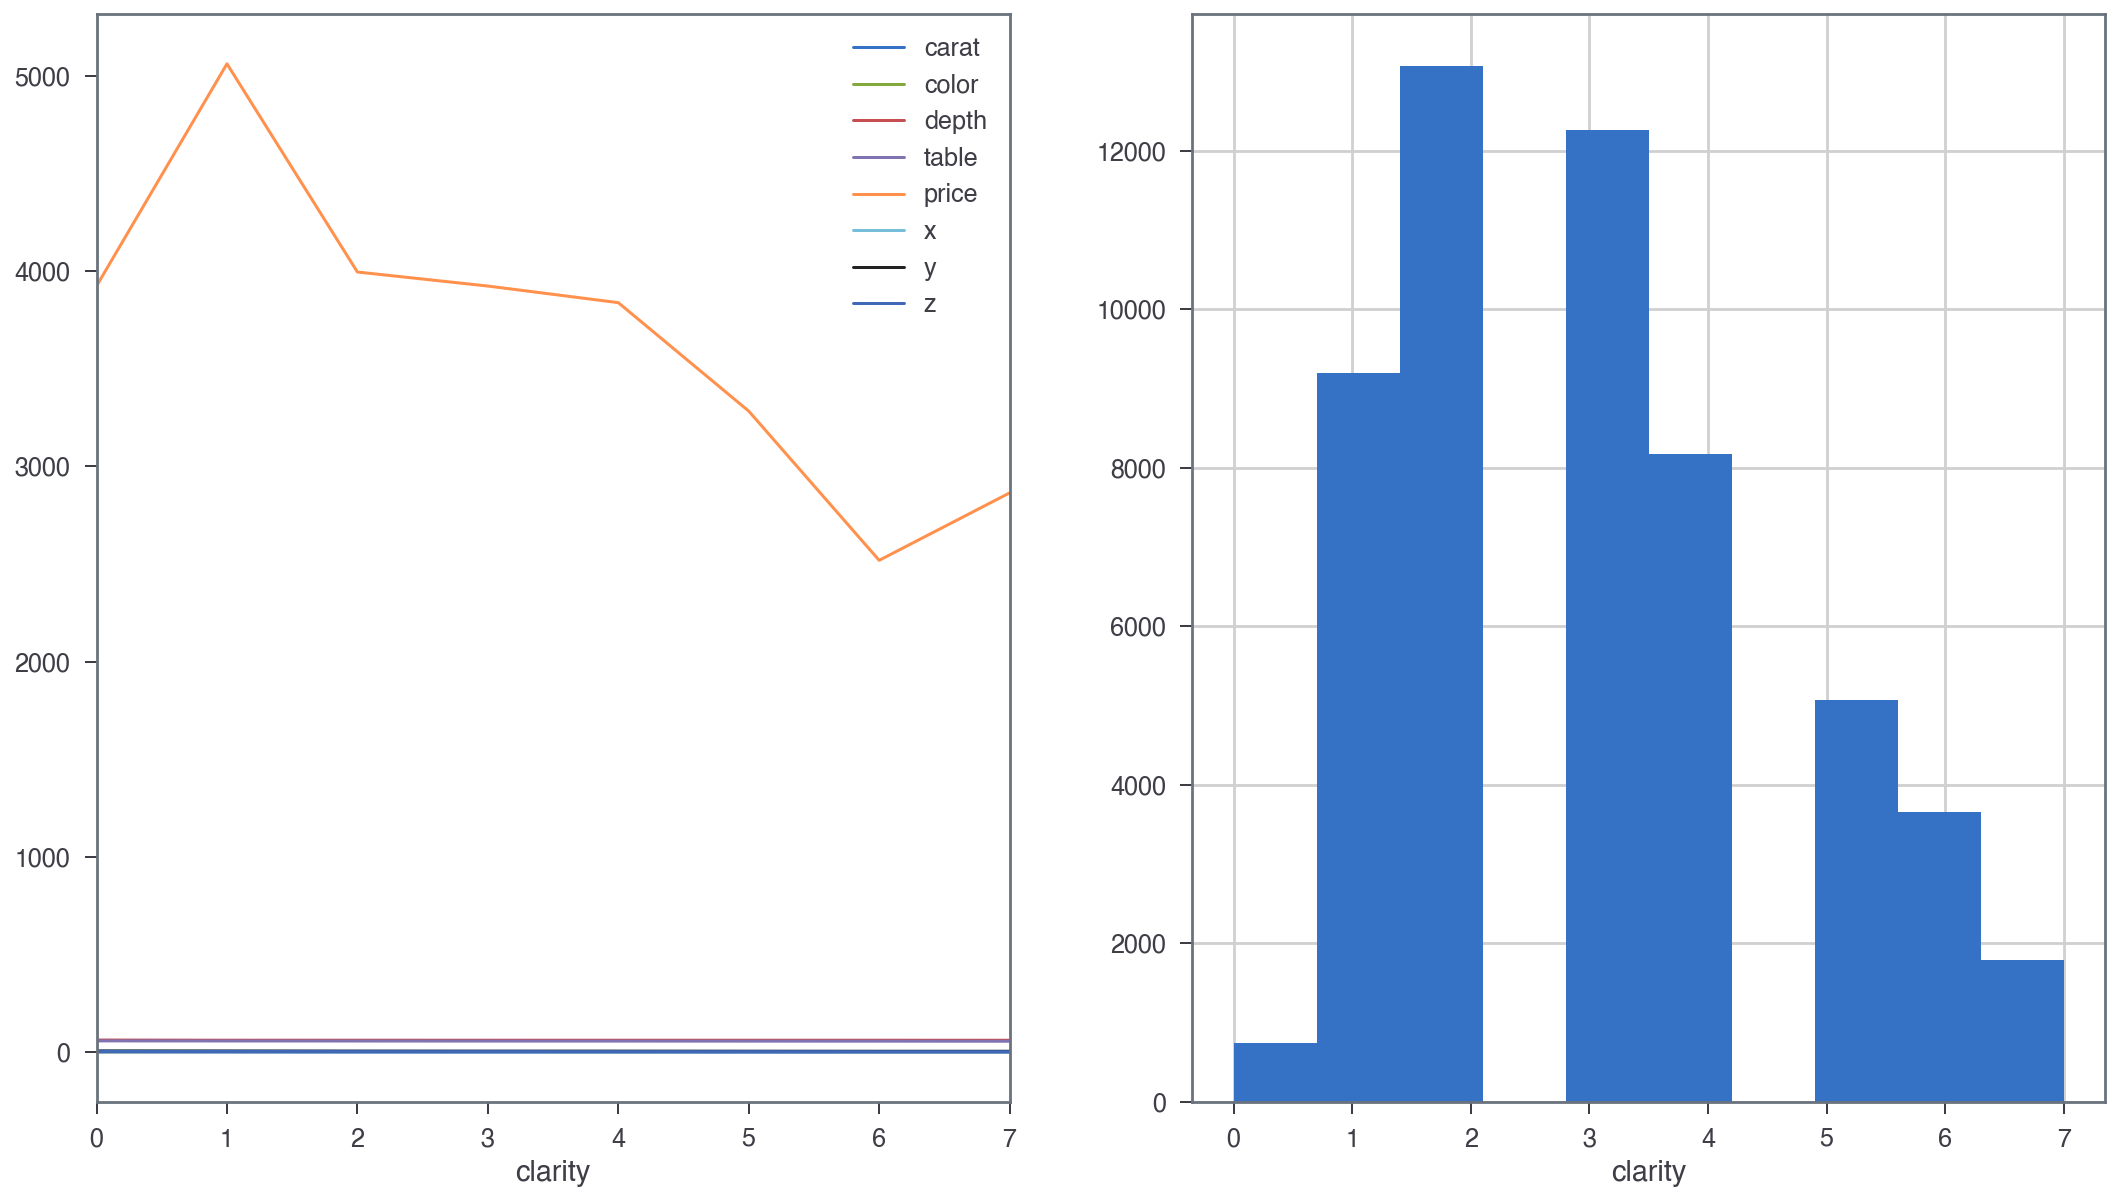

In [13]:
# PLOTS & COMMENTS
'''
Price doesn't seem to be that well related with the diamond's clarity. It seems to be going down, and
at the very end it starts picking up and there is a slight rise up.
In the second plot we can check that the clarity seems to be pretty spread apart.
'''
fig, axes = plt.subplots(1, 2, figsize = (18, 10))
diamonds_clarity_grouped.plot(ax = axes[0])
clarity_plot = diamonds['clarity'].hist(ax = axes[1])
clarity_plot.set_xlabel('clarity')
plt.show()

**After looking at your results, which features do you think will affect price the most now? Regarding your hypotheses, do they match your final results? Provide a small overview.**

In [ ]:
#your thoughts here
'''
From the looks of it it seems that what will impact price the most is definately the carat, as it is
the factor that seems to have the highest correlation with it. The other factor analyzed above kind of
seem to be unrelated or even going in opposite directions.
'''

# 4. Taking a deeper look with plots and correlations

To take a deeper look, we will use the `pairplot` method of `seaborn` library. This method plots a scatterplot for each pair of features and in the diagonal the distribution of the feature.

So if you have many features it will take a while, be careful!


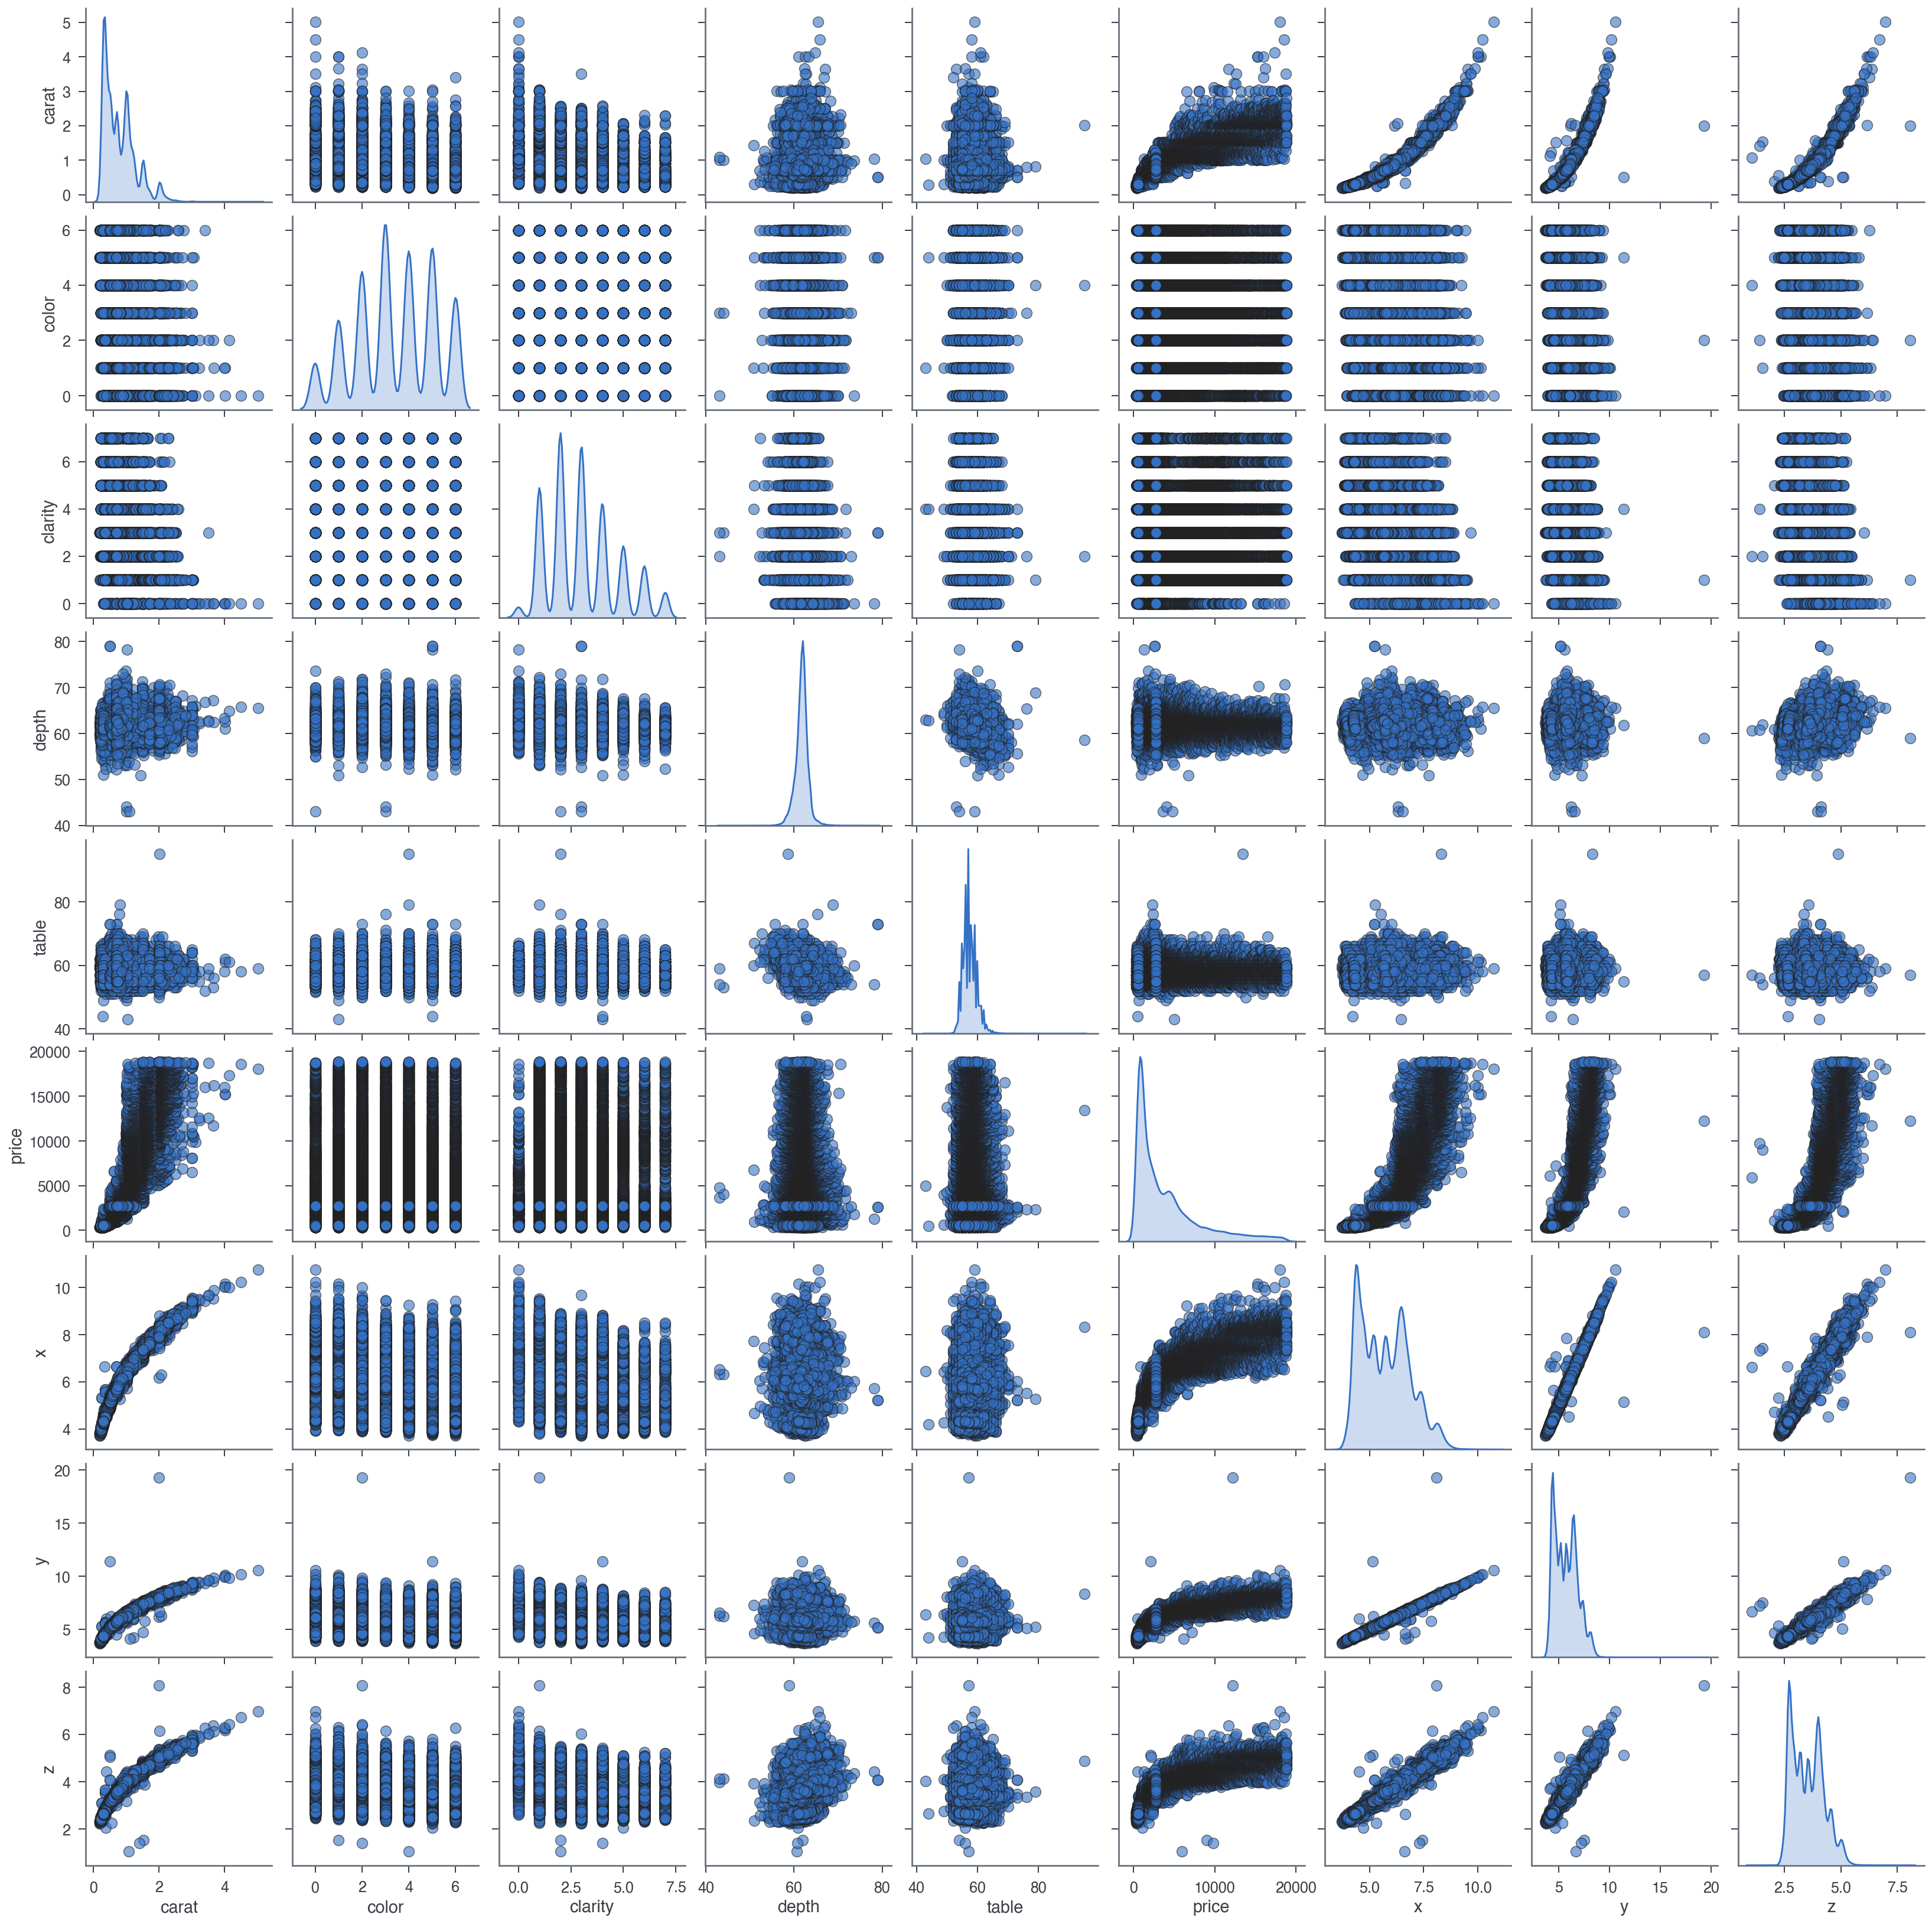

In [14]:
#Run this code
import seaborn as sns
sns.pairplot(diamonds, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'});

**What do you see here? What relationships between variables are the most interesting?**

In [ ]:
# COMMENTS
'''
There is a relationship between carat, x, y and z, as they are all linked in the sense that a heavier
diamond will naturally be larger.
There is also a good relationship between price and carat, x, y and z, because bigger diamonds will
be more expensive.
Also, there is obviously a good relationship between x, y and z, as they are the shapes of the
diamond and they tend to be cut in proportional ways.
'''

Now we will see a correlation matrix with a plot. As you know a higher correlation means that the feature could be an effect (**but is not for sure**) for the changes on the price.

We will see this with a matrix with colors. A lighter color means greater correlation. 

This is done with the `seaborn` library as well.

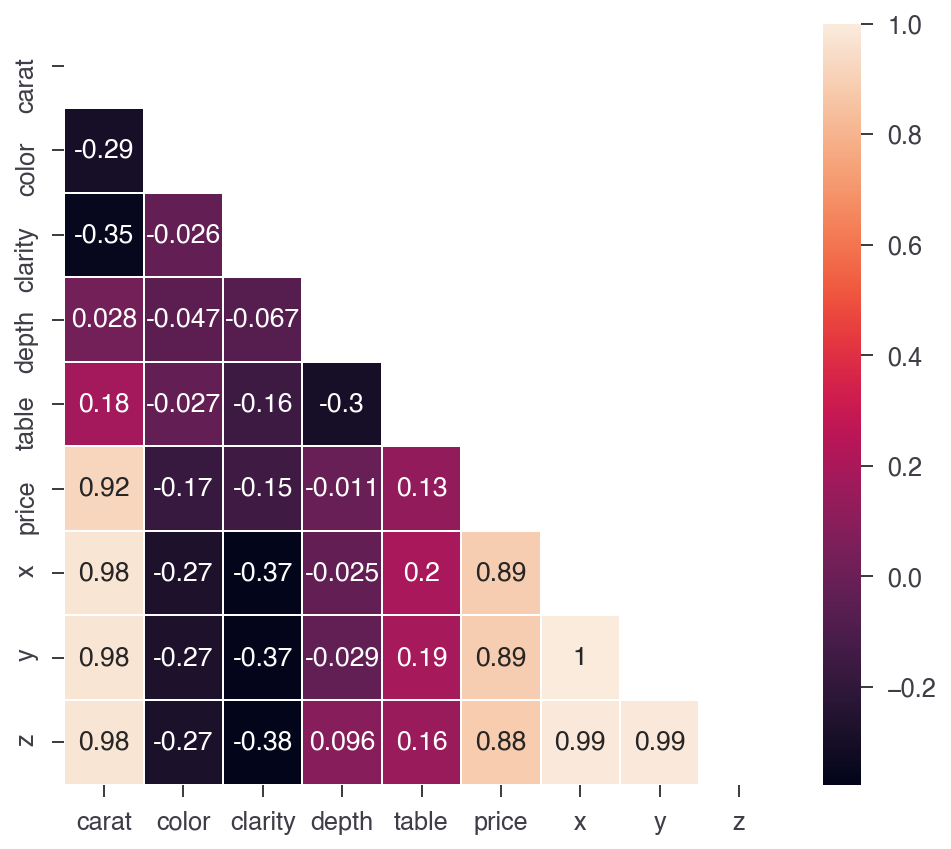

In [32]:
# CORRELATION MATRIX
correlation = diamonds.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(correlation, linewidths = 0.5, annot = True, mask = mask);

**What do you see here? Regarding the results before, does it fit with them?**

In [ ]:
# Seems like what was said before with the pairplot can also be applied here with the matrix

Finally, we will calculate the linear regression between the price and the weight. This will be done first by plotting it with the `seaborn` library and then calculating the error with the `scipy` library.

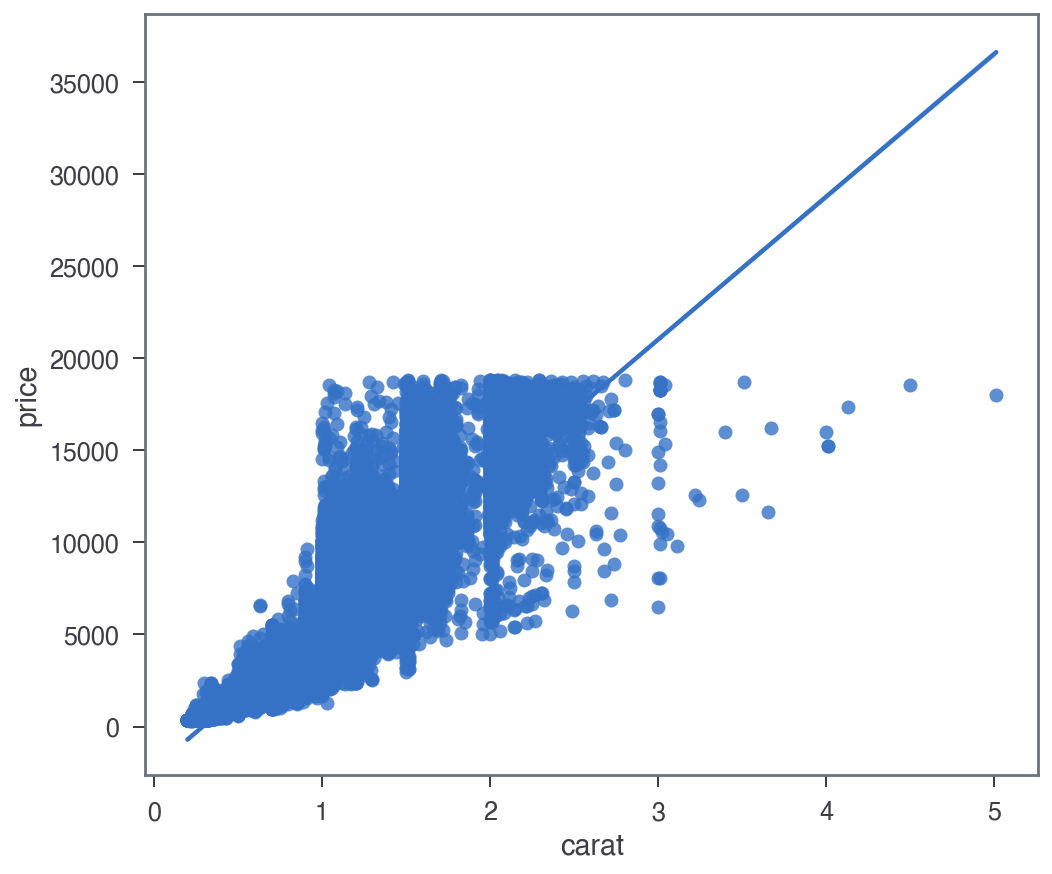

In [36]:
# Linear regression with Seaborn
sns.regplot(x = 'carat', y = 'price', data = diamonds);

In [62]:
# Calculating the standard error
# I don't think this is right? Couldn't figure out the right way. But there must be an easy way
# with these simple functions without having to write a lot of stuff
print(diamonds[['carat', 'price']].sem())
print('\n')
print(sem((diamonds['carat'], diamonds['price'])))
#diamonds.sem(diamonds['carat']['price'])
diamonds.sem()

carat     0.002041
price    17.175599
dtype: float64


[ 162.885  162.895  163.385 ... 1378.15  1378.07  1378.125]


carat       0.002041
color       0.007325
clarity     0.007092
depth       0.006168
table       0.009620
price      17.175599
x           0.004821
y           0.004794
z           0.002980
dtype: float64

**What do you think?**

In [ ]:
# I don't know. I think I couldn't find the right way to calculate this error between both series
# Found out some interesting things with the pandas sem func and scipy's sem but wasn't getting
# it right

**Would you do any other checks on other features? Do you have any comments regarding `carat`?**

In [ ]:
#your thoughts here

**Conclusion**

**From our dataset** we can conclude that although `color` and `clarity` have a classification, and thus an assigned importance or weight, they do not influence the monetary value of a diamond in determining way. While it is true that different colors or clarities may have different prices, upon closer examination those variations in price seem to be linked to `carat` (weight) and its `dimensions`. In our analysis, the key factor to determining a diamond's value was placed solely in the aforementioned features, since we can see in our correlation coefficients and in the coefficient of determination that these features are closely related.